In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
from sklearn.metrics import log_loss
from sklearn.metrics import average_precision_score as aps
from sklearn.metrics import roc_auc_score as auc

In [46]:
df = pd.read_csv('train.csv')

In [47]:
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [48]:
feature_list = list(df.columns)
feature_list.remove('ID_code')
feature_list.remove('target')

X = df[feature_list].values
y = df['target'].values

In [49]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size = 0.3)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size = 0.2)

In [50]:
import lightgbm as lgb

In [51]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_val = lgb.Dataset(X_val, y_val, reference=lgb_train)

lgbm_params = {
    'objective': 'binary',
    'is_unbalance': True,
    'num_leaves': 24,
}

# 上記のパラメータでモデルを学習する
model = lgb.train(lgbm_params, lgb_train, valid_sets=lgb_val, num_boost_round=1000)

[1]	valid_0's binary_logloss: 0.324061
[2]	valid_0's binary_logloss: 0.336345
[3]	valid_0's binary_logloss: 0.351488
[4]	valid_0's binary_logloss: 0.367858
[5]	valid_0's binary_logloss: 0.383722
[6]	valid_0's binary_logloss: 0.398898
[7]	valid_0's binary_logloss: 0.412618
[8]	valid_0's binary_logloss: 0.425771
[9]	valid_0's binary_logloss: 0.437665
[10]	valid_0's binary_logloss: 0.448976
[11]	valid_0's binary_logloss: 0.459381
[12]	valid_0's binary_logloss: 0.468569
[13]	valid_0's binary_logloss: 0.477188
[14]	valid_0's binary_logloss: 0.485307
[15]	valid_0's binary_logloss: 0.491816
[16]	valid_0's binary_logloss: 0.49806
[17]	valid_0's binary_logloss: 0.502849
[18]	valid_0's binary_logloss: 0.507392
[19]	valid_0's binary_logloss: 0.511522
[20]	valid_0's binary_logloss: 0.51485
[21]	valid_0's binary_logloss: 0.518024
[22]	valid_0's binary_logloss: 0.520763
[23]	valid_0's binary_logloss: 0.523005
[24]	valid_0's binary_logloss: 0.524239
[25]	valid_0's binary_logloss: 0.524961
[26]	valid_

[205]	valid_0's binary_logloss: 0.374443
[206]	valid_0's binary_logloss: 0.374058
[207]	valid_0's binary_logloss: 0.373666
[208]	valid_0's binary_logloss: 0.373142
[209]	valid_0's binary_logloss: 0.372671
[210]	valid_0's binary_logloss: 0.372147
[211]	valid_0's binary_logloss: 0.371702
[212]	valid_0's binary_logloss: 0.371289
[213]	valid_0's binary_logloss: 0.37082
[214]	valid_0's binary_logloss: 0.370355
[215]	valid_0's binary_logloss: 0.369822
[216]	valid_0's binary_logloss: 0.369421
[217]	valid_0's binary_logloss: 0.369049
[218]	valid_0's binary_logloss: 0.368721
[219]	valid_0's binary_logloss: 0.368227
[220]	valid_0's binary_logloss: 0.3678
[221]	valid_0's binary_logloss: 0.367324
[222]	valid_0's binary_logloss: 0.366924
[223]	valid_0's binary_logloss: 0.366564
[224]	valid_0's binary_logloss: 0.366119
[225]	valid_0's binary_logloss: 0.36564
[226]	valid_0's binary_logloss: 0.36527
[227]	valid_0's binary_logloss: 0.364838
[228]	valid_0's binary_logloss: 0.3643
[229]	valid_0's binary_

[406]	valid_0's binary_logloss: 0.316606
[407]	valid_0's binary_logloss: 0.316434
[408]	valid_0's binary_logloss: 0.316299
[409]	valid_0's binary_logloss: 0.316126
[410]	valid_0's binary_logloss: 0.315864
[411]	valid_0's binary_logloss: 0.315655
[412]	valid_0's binary_logloss: 0.315453
[413]	valid_0's binary_logloss: 0.315295
[414]	valid_0's binary_logloss: 0.31515
[415]	valid_0's binary_logloss: 0.315004
[416]	valid_0's binary_logloss: 0.314812
[417]	valid_0's binary_logloss: 0.314648
[418]	valid_0's binary_logloss: 0.314461
[419]	valid_0's binary_logloss: 0.314279
[420]	valid_0's binary_logloss: 0.314094
[421]	valid_0's binary_logloss: 0.313891
[422]	valid_0's binary_logloss: 0.313731
[423]	valid_0's binary_logloss: 0.313564
[424]	valid_0's binary_logloss: 0.313377
[425]	valid_0's binary_logloss: 0.313215
[426]	valid_0's binary_logloss: 0.313041
[427]	valid_0's binary_logloss: 0.312874
[428]	valid_0's binary_logloss: 0.312693
[429]	valid_0's binary_logloss: 0.312535
[430]	valid_0's b

[607]	valid_0's binary_logloss: 0.288775
[608]	valid_0's binary_logloss: 0.288651
[609]	valid_0's binary_logloss: 0.28858
[610]	valid_0's binary_logloss: 0.288469
[611]	valid_0's binary_logloss: 0.288337
[612]	valid_0's binary_logloss: 0.288187
[613]	valid_0's binary_logloss: 0.288117
[614]	valid_0's binary_logloss: 0.288027
[615]	valid_0's binary_logloss: 0.287915
[616]	valid_0's binary_logloss: 0.287804
[617]	valid_0's binary_logloss: 0.287688
[618]	valid_0's binary_logloss: 0.287583
[619]	valid_0's binary_logloss: 0.287447
[620]	valid_0's binary_logloss: 0.287358
[621]	valid_0's binary_logloss: 0.287229
[622]	valid_0's binary_logloss: 0.287062
[623]	valid_0's binary_logloss: 0.286972
[624]	valid_0's binary_logloss: 0.286888
[625]	valid_0's binary_logloss: 0.286784
[626]	valid_0's binary_logloss: 0.286653
[627]	valid_0's binary_logloss: 0.286581
[628]	valid_0's binary_logloss: 0.286433
[629]	valid_0's binary_logloss: 0.286254
[630]	valid_0's binary_logloss: 0.286121
[631]	valid_0's b

[811]	valid_0's binary_logloss: 0.268852
[812]	valid_0's binary_logloss: 0.268786
[813]	valid_0's binary_logloss: 0.268665
[814]	valid_0's binary_logloss: 0.268582
[815]	valid_0's binary_logloss: 0.268529
[816]	valid_0's binary_logloss: 0.268427
[817]	valid_0's binary_logloss: 0.268407
[818]	valid_0's binary_logloss: 0.268331
[819]	valid_0's binary_logloss: 0.268208
[820]	valid_0's binary_logloss: 0.268102
[821]	valid_0's binary_logloss: 0.268022
[822]	valid_0's binary_logloss: 0.267907
[823]	valid_0's binary_logloss: 0.267869
[824]	valid_0's binary_logloss: 0.2678
[825]	valid_0's binary_logloss: 0.267732
[826]	valid_0's binary_logloss: 0.267615
[827]	valid_0's binary_logloss: 0.267543
[828]	valid_0's binary_logloss: 0.267454
[829]	valid_0's binary_logloss: 0.267366
[830]	valid_0's binary_logloss: 0.267288
[831]	valid_0's binary_logloss: 0.267241
[832]	valid_0's binary_logloss: 0.267157
[833]	valid_0's binary_logloss: 0.267072
[834]	valid_0's binary_logloss: 0.266927
[835]	valid_0's bi

In [52]:
ctr_train = np.array(y_train).mean()

In [53]:
# テストデータを予測する
def evals(X, y_true, ctr_train):
    y_pred = model.predict(X)
    y_pred_post = y_pred / (y_pred  +  (1 - ctr_train) / ctr_train  * (1 - y_pred) )
    print('logloss: %.4f' % log_loss(y_true, y_pred))
    print('logloss_post: %.4f' % log_loss(y_true, y_pred_post))
    print('auc: %.4f' % auc(y_true, y_pred))
    print('norm aps:  %.4f' % (aps(y_true, y_pred)/y_true.mean()))

In [54]:
print('-'*10)
evals(X_train, y_train, ctr_train)
print('-'*10)
evals(X_val, y_val, ctr_train)
print('-'*10)
evals(X_test, y_test, ctr_train)

----------
logloss: 0.1246
logloss_post: 0.0842
auc: 0.9997
norm aps:  9.8111
----------
logloss: 0.2557
logloss_post: 0.2461
auc: 0.8821
norm aps:  5.6484
----------
logloss: 0.2569
logloss_post: 0.2498
auc: 0.8797
norm aps:  5.5927


In [55]:
def gen_plot_points(X, y_true, num_points=100):
    y_pred = model.predict(X) 
    scores = []
    ctrs = []
    delta = 1 / num_points
    for i in range(num_points):
        mask = (y_pred >= delta * i) * (y_pred < delta * (i +1))
        if mask.sum() > 0:
            scores.append(y_pred[mask].mean())
            ctrs.append(y_true[mask].mean())
    return scores, ctrs

In [56]:
scores_train, ctrs_train  =  gen_plot_points(X_train, y_train)
scores_val, ctrs_val  =  gen_plot_points(X_val, y_val)
scores_test, ctrs_test  =  gen_plot_points(X_test, y_test)

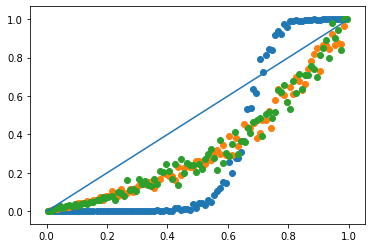

In [57]:
plt.scatter(scores_train, ctrs_train)
plt.scatter(scores_test, ctrs_test)
plt.scatter(scores_val, ctrs_val )

plt.plot([0,1], [0,1])
plt.show()

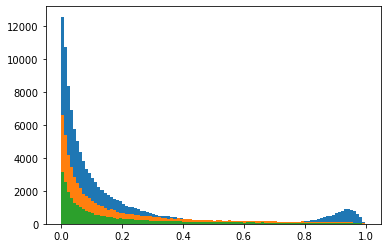

In [58]:
plt.hist(model.predict(X_train) , bins=100)
plt.hist(model.predict(X_test) , bins=100)
plt.hist(model.predict(X_val) , bins=100)
plt.show()

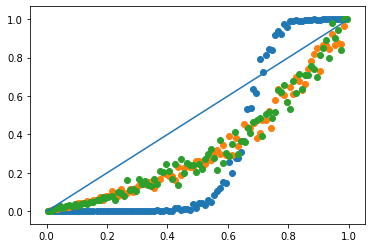

In [59]:
plt.scatter(scores_train, ctrs_train)
plt.scatter(scores_test, ctrs_test)
plt.scatter(scores_val, ctrs_val )

plt.plot([0,1], [0,1])
plt.show()

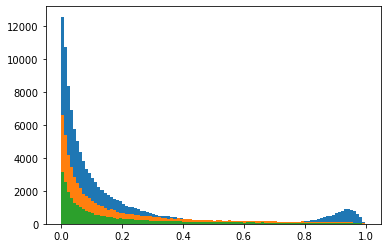

In [60]:
plt.hist(model.predict(X_train) , bins=100)
plt.hist(model.predict(X_test) , bins=100)
plt.hist(model.predict(X_val) , bins=100)
plt.show()

In [61]:
def post(scores, ctr_train):
    s_prev = np.array(scores)
    return s_prev / (s_prev  +  (1 - ctr_train) / ctr_train  * (1 - s_prev) )

In [62]:
s_post_train = post(scores_train, ctr_train)
s_post_val = post(scores_val, ctr_train)
s_post_test = post(scores_test, ctr_train)

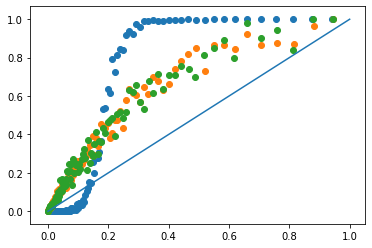

In [63]:
plt.scatter(s_post_train, ctrs_train)
plt.scatter(s_post_test, ctrs_test)
plt.scatter(s_post_val, ctrs_val )

plt.plot([0,1], [0,1])
plt.show()